Please refer to the following [documentation](http://rpy.sourceforge.net/rpy2/doc-2.4/html/interactive.html) for details on the rpy2 and jupyter integration.

This is piecewiese regression for metaphase mitotic spindles only.

#I. Preparation

###Load necessary libraries

In [51]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [52]:
%%R
library(ggplot2)

###Additional data preparation

In [242]:
%%R 
print(getwd())
list.files()
original<-read.csv('original.csv',stringsAsFactors=FALSE)
dim(original)

[1] "/Volumes/Magdalena_NEW1/ZOO_DATA/Zoo Data/FINAL"
[1] 2001   41


In [54]:
%%R
names(original) #41 variables

 [1] "time_pf"                         "num_of_cells"                   
 [3] "meiotic"                         "stage"                          
 [5] "cell_diameter_um"                "spindle_length__asters_um"      
 [7] "spindle_length_poles_um"         "spindle_width_um"               
 [9] "spindle_aspect_ratio_asters_um"  "spindle_aspect_ratio_poles_um"  
[11] "astere.to.pole_distance_1_um"    "aster.to.pole_distance_2_um"    
[13] "inner_aster_diameter_1_um"       "inner_aster_diameter_2_um"      
[15] "outer_aster_diameter_1_um"       "outer__diameter_2_um"           
[17] "centrosome"                      "metaphase_plate_lengt_h_um"     
[19] "metaphase_plate_width_um"        "metaphase_plate_aspect_ratio_um"
[21] "polar_body_diameter_1_um"        "polar_body_diameter_2_um"       
[23] "distance_between_chromosomes_um" "microscope"                     
[25] "fixation"                        "organism"                       
[27] "phylum"                          "classificat

As you can see there are 41 variables.

In [55]:
%%R
original.SQL<-read.csv('../SEPTEMBER_2014/df2_original_for_SQL.csv',stringsAsFactors=FALSE)
print(dim(original.SQL)) 
names(original.SQL)

[1] 2001   44
 [1] "date"                            "image"                          
 [3] "objective"                       "time_pf"                        
 [5] "num_of_cells"                    "meiotic"                        
 [7] "stage"                           "cell_diameter_um"               
 [9] "spindle_length__asters_um"       "spindle_length_poles_um"        
[11] "spindle_width_um"                "spindle_aspect_ratio_asters_um" 
[13] "spindle_aspect_ratio_poles_um"   "astere.to.pole_distance_1_um"   
[15] "aster.to.pole_distance_2_um"     "inner_aster_diameter_1_um"      
[17] "inner_aster_diameter_2_um"       "outer_aster_diameter_1_um"      
[19] "outer__diameter_2_um"            "centrosome"                     
[21] "metaphase_plate_lengt_h_um"      "metaphase_plate_width_um"       
[23] "metaphase_plate_aspect_ratio_um" "polar_body_diameter_1_um"       
[25] "polar_body_diameter_2_um"        "distance_between_chromosomes_um"
[27] "microscope"                    

This data frame contains all possible variables (i.e. there is a lot of redundancy, but you can choose, which encoding or variables suit you best).

###Color set-up

In [56]:
%%R
new_cols<-c("#F8766D","#00B0F6","#FF6A98","#35A2FF","#C09B00","#E76BF3","#EA8331","#7CAE00","#9590FF","#39B600","#A3A500","#00BB4E","#FF62BC","#00BAE0","#00C1A3","#FA62DB","#00BF7D","#D89000","#00BAE0","#C77CFF")
my_labels=unique(original$organism)
mapping_vector2<-setNames(object=as.character(new_cols),nm=my_labels)

###Average out variables that have a measurement on two sides of the spindle.

In [57]:
%%R
print(grep('pole_distance',names(original.SQL)))
print(names(original.SQL)[c(14,15)])
original.SQL$astere.to.pole_distance_AVG<-apply(original.SQL[,c(14,15)],1,mean,rm=TRUE)

[1] 14 15
[1] "astere.to.pole_distance_1_um" "aster.to.pole_distance_2_um" 


In [58]:
%%R
original.SQL<-original.SQL[-c(14,15)]
print(names(original.SQL))

 [1] "date"                            "image"                          
 [3] "objective"                       "time_pf"                        
 [5] "num_of_cells"                    "meiotic"                        
 [7] "stage"                           "cell_diameter_um"               
 [9] "spindle_length__asters_um"       "spindle_length_poles_um"        
[11] "spindle_width_um"                "spindle_aspect_ratio_asters_um" 
[13] "spindle_aspect_ratio_poles_um"   "inner_aster_diameter_1_um"      
[15] "inner_aster_diameter_2_um"       "outer_aster_diameter_1_um"      
[17] "outer__diameter_2_um"            "centrosome"                     
[19] "metaphase_plate_lengt_h_um"      "metaphase_plate_width_um"       
[21] "metaphase_plate_aspect_ratio_um" "polar_body_diameter_1_um"       
[23] "polar_body_diameter_2_um"        "distance_between_chromosomes_um"
[25] "microscope"                      "fixation"                       
[27] "organism"                        "phylum"    

In [59]:
%%R
print(grep('inner_aster',names(original.SQL)))
print(names(original.SQL)[c(14,15)])
original.SQL$inner_aster_diameter_AVG<-apply(original.SQL[,c(14,15)],1,mean,na.rm=TRUE)
to_drop<-c('inner_aster_diameter_1_um',"inner_aster_diameter_2_um")
original.SQL<-original.SQL[,!names(original.SQL) %in% to_drop]
print(names(original.SQL))

[1] 14 15
[1] "inner_aster_diameter_1_um" "inner_aster_diameter_2_um"
 [1] "date"                            "image"                          
 [3] "objective"                       "time_pf"                        
 [5] "num_of_cells"                    "meiotic"                        
 [7] "stage"                           "cell_diameter_um"               
 [9] "spindle_length__asters_um"       "spindle_length_poles_um"        
[11] "spindle_width_um"                "spindle_aspect_ratio_asters_um" 
[13] "spindle_aspect_ratio_poles_um"   "outer_aster_diameter_1_um"      
[15] "outer__diameter_2_um"            "centrosome"                     
[17] "metaphase_plate_lengt_h_um"      "metaphase_plate_width_um"       
[19] "metaphase_plate_aspect_ratio_um" "polar_body_diameter_1_um"       
[21] "polar_body_diameter_2_um"        "distance_between_chromosomes_um"
[23] "microscope"                      "fixation"                       
[25] "organism"                        "phylum"       

In [60]:
%%R
print(grep('polar_body',names(original.SQL)))
print(names(original.SQL)[c(20,21)])
original.SQL$polar_body_diameter_AVG<-apply(original.SQL[,c(20,21)],1,mean,na.rm=TRUE)
original.SQL<-original.SQL[-c(20,21)]
print(names(original.SQL))

[1] 20 21
[1] "polar_body_diameter_1_um" "polar_body_diameter_2_um"
 [1] "date"                            "image"                          
 [3] "objective"                       "time_pf"                        
 [5] "num_of_cells"                    "meiotic"                        
 [7] "stage"                           "cell_diameter_um"               
 [9] "spindle_length__asters_um"       "spindle_length_poles_um"        
[11] "spindle_width_um"                "spindle_aspect_ratio_asters_um" 
[13] "spindle_aspect_ratio_poles_um"   "outer_aster_diameter_1_um"      
[15] "outer__diameter_2_um"            "centrosome"                     
[17] "metaphase_plate_lengt_h_um"      "metaphase_plate_width_um"       
[19] "metaphase_plate_aspect_ratio_um" "distance_between_chromosomes_um"
[21] "microscope"                      "fixation"                       
[23] "organism"                        "phylum"                         
[25] "classification"                  "genome"         

In [61]:
%%R
print(grep('outer_',names(original.SQL)))
print(names(original.SQL)[c(14,15)])
original.SQL$outer_aster_diameter_AVG<-apply(original.SQL[,c(14,15)],1,mean, na.rm=TRUE)
original.SQL<-original.SQL[-c(14,15)]
print(names(original.SQL))

[1] 14 15
[1] "outer_aster_diameter_1_um" "outer__diameter_2_um"     
 [1] "date"                            "image"                          
 [3] "objective"                       "time_pf"                        
 [5] "num_of_cells"                    "meiotic"                        
 [7] "stage"                           "cell_diameter_um"               
 [9] "spindle_length__asters_um"       "spindle_length_poles_um"        
[11] "spindle_width_um"                "spindle_aspect_ratio_asters_um" 
[13] "spindle_aspect_ratio_poles_um"   "centrosome"                     
[15] "metaphase_plate_lengt_h_um"      "metaphase_plate_width_um"       
[17] "metaphase_plate_aspect_ratio_um" "distance_between_chromosomes_um"
[19] "microscope"                      "fixation"                       
[21] "organism"                        "phylum"                         
[23] "classification"                  "genome"                         
[25] "chromosomes"                     "day"          

In [62]:
%%R
dim(original.SQL)

[1] 2001   40


In [63]:
%%R
#write.csv(original.SQL,file='original_SQL_without_dupes_from_R.csv')

NULL


###Verifying variable types

####1. Metadata

In [64]:
%%R
metadata.cols<-c('date','image','objective','microscope','fixation','day')
#names(original.SQL) %in% metadata.cols
#head(original.SQL[1:2,names(original.SQL) %in% metadata.cols], 1L)
#head(original.SQL[,!names(original.SQL) %in% metadata.cols], 1L)

####2. Continuous

In [65]:
%%R
continuous.vars<-c("cell_diameter_um","distance_between_chromosomes_um","genome","metaphase_plate_aspect_ratio_um","metaphase_plate_lengt_h_um","metaphase_plate_width_um","spindle_aspect_ratio_asters_um","spindle_aspect_ratio_poles_um","spindle_length__asters_um","spindle_length_poles_um","spindle_width_um","astere.to.pole_distance_AVG","inner_aster_diameter_AVG","polar_body_diameter_AVG","outer_aster_diameter_AVG")
length(continuous.vars)
for(i in 1:length(continuous.vars)){
  print(class(unlist(original.SQL[continuous.vars[i]])))
} 

[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"


####3. Categorical

In [66]:
%%R
print(grep('_CAT',names(original.SQL),value=TRUE))
cats_to_parse<-grep('_CAT',names(original.SQL),value=TRUE)

print(strsplit(grep('_CAT',names(original.SQL),value = TRUE)[1],'_CAT')[[1]])
print(length(sapply(cats_to_parse,function(x){strsplit(x,'_CAT')[[1]]})))
print(sapply(cats_to_parse,function(x){strsplit(x,'_CAT')[[1]]}))

cat.cols<-c(grep('_CAT',names(original.SQL),value=TRUE),sapply(cats_to_parse,function(x){strsplit(x,'_CAT')[[1]]}))
print(length(cat.cols))
names(cat.cols)<-rep('',length(cat.cols))
cat.cols<-c(cat.cols,'meiotic','centrosome')
print(names(original.SQL))
print(cat.cols)

[1] "num_of_cells_CAT"   "classification_CAT" "phylum_CAT"        
[4] "organism_CAT"       "cleavage_type_CAT"  "fixation_CAT"      
[7] "microscope_CAT"     "stage_CAT"         
[1] "num_of_cells"
[1] 8
  num_of_cells_CAT classification_CAT         phylum_CAT       organism_CAT 
    "num_of_cells"   "classification"           "phylum"         "organism" 
 cleavage_type_CAT       fixation_CAT     microscope_CAT          stage_CAT 
   "cleavage_type"         "fixation"       "microscope"            "stage" 
[1] 16
 [1] "date"                            "image"                          
 [3] "objective"                       "time_pf"                        
 [5] "num_of_cells"                    "meiotic"                        
 [7] "stage"                           "cell_diameter_um"               
 [9] "spindle_length__asters_um"       "spindle_length_poles_um"        
[11] "spindle_width_um"                "spindle_aspect_ratio_asters_um" 
[13] "spindle_aspect_ratio_poles_um"   "ce

####4. Count variables

In [67]:
%%R
count.cols<-c("chromosomes","num_of_cells",'num_of_cells_NUM')

###Filter data by stage: metaphase

In [68]:
%%R
print(unique(original.SQL[(original.SQL$stage == 'm' | original.SQL$stage=='mI' | original.SQL$stage=='mII'),]$stage))

print(unique(original.SQL[(original.SQL$stage != 'm' & original.SQL$stage !='mI' & original.SQL$stage !='mII'),]$stage))

original.SQL.met<-original.SQL[(original.SQL$stage == 'm' | original.SQL$stage=='mI' | original.SQL$stage=='mII'),]

print(dim(original.SQL.met))



[1] "m"   "mII" "mI" 
[1] "a"   "p"   ""    "aII" "aI"  "i"   "pI" 
[1] 1462   40


How many organisms are represented in the data set?

###Filter data by spindle type (meiotic/mitotic)

In [69]:
%%R
original.SQL.met.mit<-original.SQL.met[which(original.SQL.met$meiotic==0),]

In [70]:
%%R
length(unique(original.SQL.met.mit$organism))

[1] 12


In [71]:
%%R
#write.csv(original.SQL.met,file='original_SQL_metaphase_only_from_R.csv')
#write.csv(original.SQL.met,file='original_SQL_mitotic_metaphase_only_from_R.csv')

NULL


#II. Analysis 

###1. Regression

Given the data published by Wuhr et. al, and Good et. al, as well as plots above, it stands to reason to use two segments in the piecewise regression.   
Let's start from the simplest linear model, though.

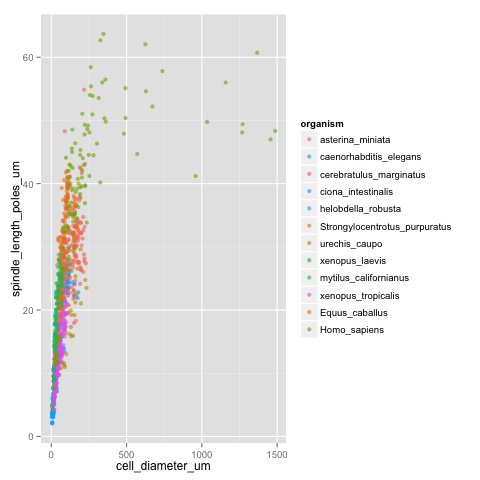

In [350]:
%%R
ggplot(data=original.SQL.met.mit)+geom_point(aes(y=spindle_length_poles_um,x=cell_diameter_um,colour=organism),alpha=0.6)+scale_color_manual(values=mapping_vector2, labels=names(mapping_vector2))

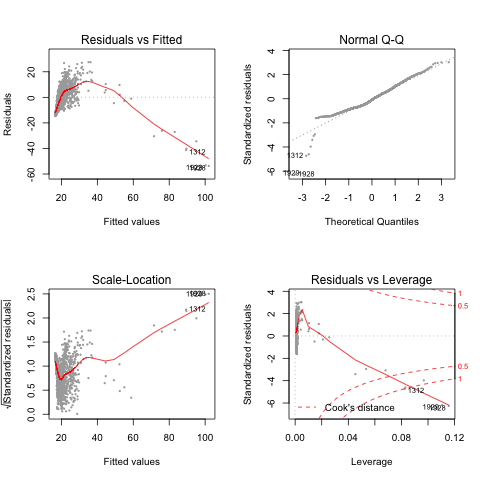

In [342]:
%%R
model_1<-lm(spindle_length_poles_um~cell_diameter_um, data=original.SQL.met.mit)
#model_1<-lm(original.SQL.met.mit$spindle_length_poles_um~original.SQL.met.mit$cell_diameter_um)
par(mfrow=c(2,2), pch=16)
plot(model_1,cex=0.5, col='darkgrey')

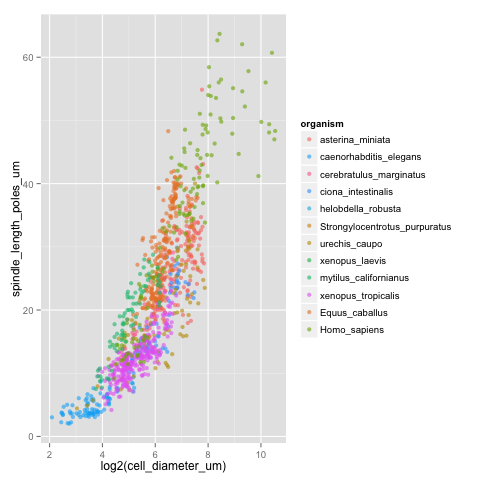

In [352]:
%%R
ggplot(data=original.SQL.met.mit)+geom_point(aes(y=spindle_length_poles_um,x=log2(cell_diameter_um),colour=organism),alpha=0.6)+scale_color_manual(values=mapping_vector2,labels=names(mapping_vector2))

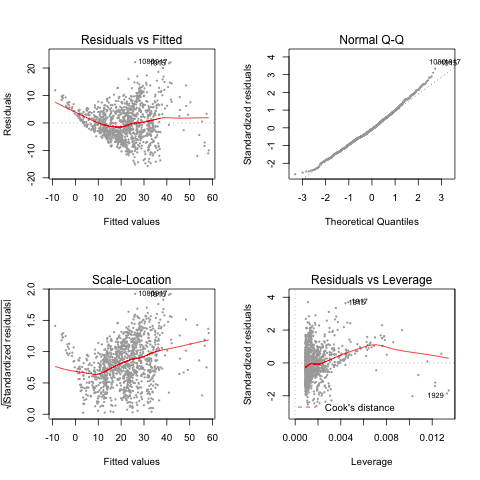

In [346]:
%%R
model_2<-lm(spindle_length_poles_um ~ log2(cell_diameter_um), data=original.SQL.met.mit)
#model_1<-lm(original.SQL.met.mit$spindle_length_poles_um~original.SQL.met.mit$cell_diameter_um)
par(mfrow=c(2,2))
plot(model_2,cex=0.5,col='darkgrey',pch=16)

Residuals vs. Fitted: heteroscedasticity, non-constant variance



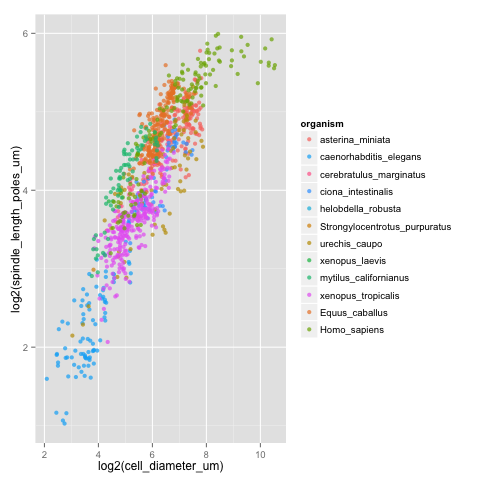

In [351]:
%%R
ggplot(data=original.SQL.met.mit)+geom_point(aes(y=log2(spindle_length_poles_um),x=log2(cell_diameter_um),colour=organism),alpha=0.7)+scale_color_manual(values=mapping_vector2,labels=names(mapping_vector2))

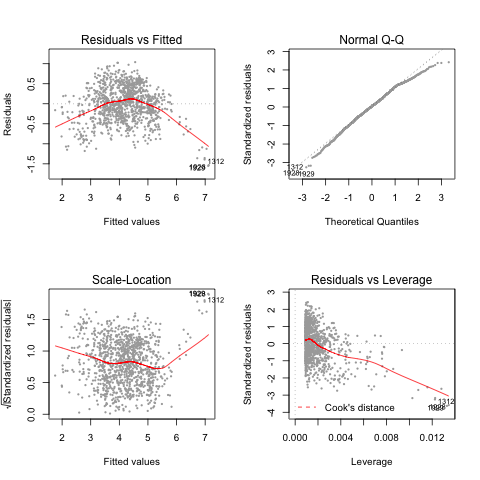

In [345]:
%%R
model_3<-lm(log2(spindle_length_poles_um)~log2(cell_diameter_um), data=original.SQL.met.mit)
#model_1<-lm(original.SQL.met.mit$spindle_length_poles_um~original.SQL.met.mit$cell_diameter_um)
par(mfrow=c(2,2), pch=16)
plot(model_3, col='darkgrey', cex=0.5)

###2. Piecewise regression

If we run piecewise regression on the non-transformed data, can we get a reasonable result?

In [81]:
%%R
print(min(original.SQL.met.mit$cell_diameter_um,na.rm=TRUE))
print(max(original.SQL.met.mit$cell_diameter_um,na.rm=TRUE))
original.SQL.met.mit$cell_diameter_um[original.SQL.met.mit$cell_diameter_um<(min(original.SQL.met.mit$cell_diameter_um,na.rm=TRUE)+10)]

[1] 4.25271
[1] 1486.643
 [1] 11.99814 12.64494 11.91729 10.30029 12.61260 12.69345 10.85007 10.63063
 [9]  7.37352  6.80757  4.25271 10.96326  5.48163  6.33864 13.89003 12.38622
[17] 14.18109 10.72071 13.85769 12.74196 11.23815 13.13004 12.96834 11.48070
[25] 10.35090  8.84430  7.03080  5.43120  6.70530  6.42630  9.65340  8.57460
[33] 12.37830 14.21343  5.65950  7.16331  6.90459 10.21944 10.81773  8.60244
[41] 12.17601  7.29267  5.67567  5.51397 11.69091 11.35134 10.09008 13.90620
[49] 10.62369 12.43473 12.83898 11.02794 11.33517  8.97435  8.06883 10.85007
[57]  5.78886  8.19819 10.75305 12.43473       NA       NA       NA       NA
[65]       NA 14.10500 13.50000 14.00000 14.25000


In [82]:
%%R
original.SQL.met.mit$cell_diameter_um[original.SQL.met.mit$cell_diameter_um<10][!is.na(original.SQL.met.mit$cell_diameter_um[original.SQL.met.mit$cell_diameter_um<10])]

 [1] 7.37352 6.80757 4.25271 5.48163 6.33864 8.84430 7.03080 5.43120 6.70530
[10] 6.42630 9.65340 8.57460 5.65950 7.16331 6.90459 8.60244 7.29267 5.67567
[19] 5.51397 8.97435 8.06883 5.78886 8.19819


In [83]:
%%R
original.SQL.met.mit$cell_diameter_um[original.SQL.met.mit$cell_diameter_um>1350][!is.na(original.SQL.met.mit$cell_diameter_um[original.SQL.met.mit$cell_diameter_um>1350])]

[1] 1367.200 1486.643 1455.718


In [84]:
%%R
#breaks<-seq(from=10, to=max(original.SQL.met$cell_diameter_um,na.rm=TRUE),by=10)
breaks<-seq(from=10, to=1350,by=10)

In [85]:
%%R
length(breaks)

[1] 135


In [86]:
%%R
breaks

  [1]   10   20   30   40   50   60   70   80   90  100  110  120  130  140  150
 [16]  160  170  180  190  200  210  220  230  240  250  260  270  280  290  300
 [31]  310  320  330  340  350  360  370  380  390  400  410  420  430  440  450
 [46]  460  470  480  490  500  510  520  530  540  550  560  570  580  590  600
 [61]  610  620  630  640  650  660  670  680  690  700  710  720  730  740  750
 [76]  760  770  780  790  800  810  820  830  840  850  860  870  880  890  900
 [91]  910  920  930  940  950  960  970  980  990 1000 1010 1020 1030 1040 1050
[106] 1060 1070 1080 1090 1100 1110 1120 1130 1140 1150 1160 1170 1180 1190 1200
[121] 1210 1220 1230 1240 1250 1260 1270 1280 1290 1300 1310 1320 1330 1340 1350


*How to decide on where to put a break?*   
Below are three functions generating break points (mult_of_10(), mult_of_3() and mult_of_2). They generate vectors in 10, 3, 2 (micrometers), respectively. The 10 micrometer one will give you lower resolution, but it may be sufficient for most applications. We ended up using 2 micrometer step. Once you decide, which step you'll take, make sure you will pick matching break_number() function. They have the same name (this is defnitely not optimal, but allows for using only one piecewise regression function, piecewise_reg()).

####Activate only one of the cells below.

In [87]:
%%R 
mult_of_10<-function(x){
    #Tests for divisibility by 10.
    #
    #Args: x - value to be tested (numeric or integer)
    #
    #Returns x if x is divisible by 10. If not, returns first value larger than x, which is divisible by 10.
   
    if (ceiling(x) %% 10 == 0){
        return(x)
    }
    else {
       while (ceiling(x)%%10!=0){
            x<-ceiling(x)+1
            if (x %% 10 == 0){
                return(x)
                break 
            }
        }
    }
}

In [216]:
%%R 
mult_of_2<-function(x){
    #Tests for divisibility by 2.
    #
    #Args: x - value to be tested (numeric or integer)
    #
    #Returns x if x is divisible by 10. If not, returns first value larger than x, which is divisible by 10.
   
    if (ceiling(x) %% 2 == 0){
        return(x)
    }
    else {
       while (ceiling(x) %%2 !=0){
            x<-ceiling(x)+1
            if (x %% 2 == 0){
                return(x)
                break 
            }
        }
    }
}

In [187]:
%%R 
mult_of_3<-function(x){
    #Tests for divisibility by 10.
    #
    #Args: x - value to be tested (numeric or integer)
    #
    #Returns x if x is divisible by 10. If not, returns first value larger than x, which is divisible by 10.
   
    if (ceiling(x) %% 3 == 0){
        return(x)
    }
    else {
       while (ceiling(x)%%3!=0){
            x<-ceiling(x)+1
            if (x %% 3 == 0){
                return(x)
                break 
            }
        }
    }
}

####Activate only one of the cells below (which uses one of the function above).

In [195]:
%%R 
break_number<-function(var_x){
    
    #USES mult_of_10()
    #1. initiate
    
    from=mult_of_10(min(var_x, na.rm=TRUE))
    to=mult_of_10(max(var_x, na.rm=TRUE))
    breaks<-seq(from=from, to=to,by=10)

    #2. check whether the marginal vectors 
    if ((sum(var_x<=min(breaks),na.rm=TRUE)>3) & (sum(var_x>=max(breaks),na.rm=TRUE)>3)){
        return(breaks)
    }
    
    if (sum(var_x<=min(breaks),na.rm=TRUE)<3){
        while (sum(var_x<=min(breaks),na.rm=TRUE)<3){
            from = from + 10
            breaks<-seq(from=from, to=to,by=10)
        }
    }

    if (sum(var_x>=max(breaks),na.rm=TRUE)<3){
        while (sum(var_x>=max(breaks),na.rm=TRUE)<3){
            to = to - 10
            breaks<-seq(from=from, to=to,by=10)
        }
    }
    return(ceiling(breaks))
}


In [213]:
%%R 
break_number<-function(var_x){
    
    #USES mult_of_3()
    #1. initiate
    
    from=mult_of_3(min(var_x, na.rm=TRUE))
    to=mult_of_3(max(var_x, na.rm=TRUE))
    breaks<-seq(from=from, to=to, by=3)

    #2. check the marginal vectors 
    if ((sum(var_x<=min(breaks),na.rm=TRUE)>3) & (sum(var_x>=max(breaks),na.rm=TRUE)>3)){
        return(breaks)
    }
    
    if (sum(var_x<=min(breaks),na.rm=TRUE)<3){
        while (sum(var_x<=min(breaks),na.rm=TRUE)<3){ #determines the length of left-most vector
            from = from + 3
            breaks<-seq(from=from, to=to, by=3)
        }
    }

    if (sum(var_x>=max(breaks),na.rm=TRUE)<3){
        while (sum(var_x>=max(breaks),na.rm=TRUE)<3){ #determines the length of right-most vector
            to = to - 3
            breaks<-seq(from=from, to=to,by=3)
        }
    }
    return(ceiling(breaks))
}


In [217]:
%%R 
break_number<-function(var_x){
    
    #USES mult_of_2()
    #1. initiate
    
    from=mult_of_2(min(var_x, na.rm=TRUE))
    to=mult_of_2(max(var_x, na.rm=TRUE))
    breaks<-seq(from=from, to=to,by=2)

    #2. check whether the marginal vectors 
    if ((sum(var_x<=min(breaks),na.rm=TRUE)>3) & (sum(var_x>=max(breaks),na.rm=TRUE)>3)){
        return(breaks)
    }
    
    if (sum(var_x<=min(breaks),na.rm=TRUE)<3){
        while (sum(var_x<=min(breaks),na.rm=TRUE)<3){
            from = from + 2
            breaks<-seq(from=from, to=to, by=2)
        }
    }

    if (sum(var_x>=max(breaks),na.rm=TRUE)<3){
        while (sum(var_x>=max(breaks),na.rm=TRUE)<3){
            to = to - 2
            breaks<-seq(from=from, to=to,by=2)
        }
    }
    return(ceiling(breaks))
}



####Activate piecewise regression function.

In [220]:
%%R
piecewise_reg<-function(data_frame, x, y){
    breaks<-break_number(data_frame[,x])

    sigma<-vector(mode='numeric',length=length(breaks))
    AIC<-vector(mode='numeric',length=length(breaks))
    BIC<-vector(mode='numeric',length=length(breaks))
    for (i in 1:length(breaks)){
        model<-lm(data_frame[,y] ~ (data_frame[,x]<breaks[i])*data_frame[,x] + (data_frame[,x]>breaks[i])*data_frame[,x])
        sigma[i]<-summary(model)$sigma #c(sigma=model$sigma,AIC=AIC(model))
        AIC[i]<-AIC(model)#c(sigma=model$sigma,AIC=AIC(model))
        BIC[i]<-BIC(model)
    }
    result = list(breaks=breaks,sigma=sigma, AIC=AIC, BIC=BIC)
    return(result)
}

In [247]:
%%R
plotter<-function(list_of_models){
    #Saves batch generated plots as PNG files (vector graphics does not work)
    
    for (i in 1:length(list_of_models)){
        plot<-ggplot(data=as.data.frame(rs[[i]]))+geom_line(aes(x=breaks,y=ceiling(AIC)),size=1,col=mapping_vector2[names(rs)[[i]]])
        ggsave(filename=paste(i,'_PR_AIC_',names(rs)[[i]],'.png',sep=''),plot=plot)
    }
}

####Piecewise regression across all species::linear 

In [221]:
%%R
pr.cell_diam.sp_len.p2p=piecewise_reg(original.SQL.met.mit,'cell_diameter_um','spindle_length_poles_um')

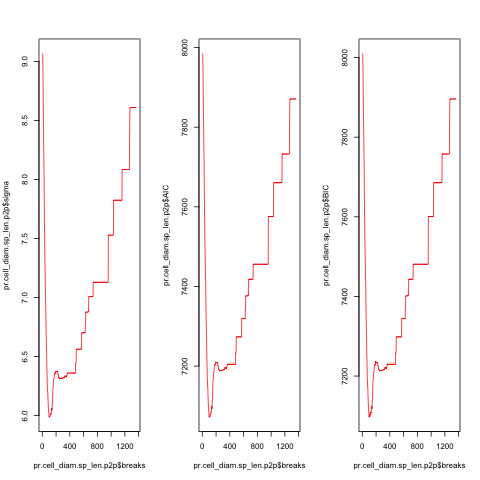

In [240]:
%%R
par(mfrow=c(1,3))
plot(pr.cell_diam.sp_len.p2p$breaks,pr.cell_diam.sp_len.p2p$sigma,type='l',col='red')
plot(pr.cell_diam.sp_len.p2p$breaks,pr.cell_diam.sp_len.p2p$AIC,type='l',col='red')
plot(pr.cell_diam.sp_len.p2p$breaks,pr.cell_diam.sp_len.p2p$BIC,type='l',col='red')

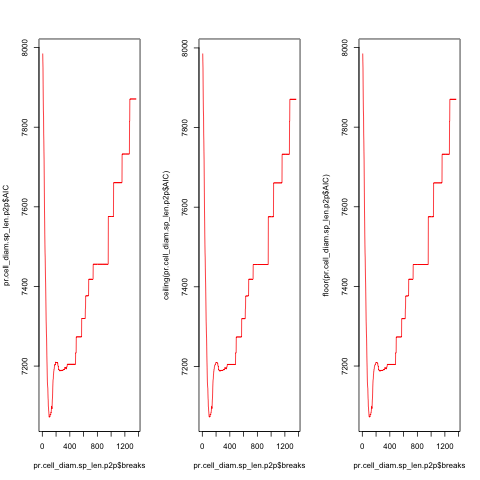

In [248]:
%%R
par(mfrow=c(1,3))
plot(pr.cell_diam.sp_len.p2p$breaks,pr.cell_diam.sp_len.p2p$AIC,type='l',col='red')
plot(pr.cell_diam.sp_len.p2p$breaks,ceiling(pr.cell_diam.sp_len.p2p$AIC),type='l',col='red')
plot(pr.cell_diam.sp_len.p2p$breaks,floor(pr.cell_diam.sp_len.p2p$AIC),type='l',col='red')

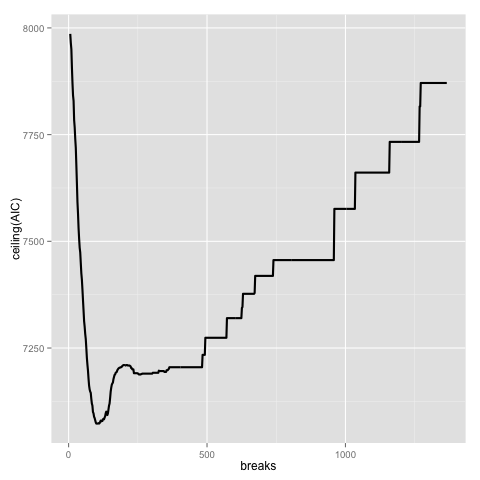

In [252]:
%%R 
ggplot(data=as.data.frame(pr.cell_diam.sp_len.p2p))+geom_line(aes(x=breaks,y=ceiling(AIC)),colour='black',size=1)

Let's define the minimum and get a range of points around it. Notice that the difference for AIC/BIC/sigma between the points around the minimum are miniscule. It is probably better to round the values and take a range of cell diamater sizes (breaks) instead of strongly focusing on a specific value.

In [254]:
%%R
print(which(pr.cell_diam.sp_len.p2p$AIC==min(pr.cell_diam.sp_len.p2p$AIC)))
print('Exact value:')
print(pr.cell_diam.sp_len.p2p$breaks[which(pr.cell_diam.sp_len.p2p$AIC==min(pr.cell_diam.sp_len.p2p$AIC))])
print('Range:')
print(pr.cell_diam.sp_len.p2p$breaks[which(ceiling(pr.cell_diam.sp_len.p2p$AIC)==min(ceiling(pr.cell_diam.sp_len.p2p$AIC)))])

[1] 50
[1] "Exact value:"
[1] 104
[1] "Range:"
[1] 100 102 104 106 110


Comparing to the linear model.

In [299]:
%%R
#original.SQL.met.mit,'cell_diameter_um','spindle_length_poles_um'
model_1a=lm(data=original.SQL.met.mit,spindle_length_poles_um ~ cell_diameter_um*(cell_diameter_um<=104) + cell_diameter_um *(cell_diameter_um>104))

In [300]:
%%R
anova(model_1, model_1a)

Analysis of Variance Table

Model 1: spindle_length_poles_um ~ cell_diameter_um
Model 2: spindle_length_poles_um ~ cell_diameter_um * (cell_diameter_um <= 
    104) + cell_diameter_um * (cell_diameter_um > 104)
  Res.Df   RSS Df Sum of Sq      F    Pr(>F)    
1   1099 91400                                  
2   1097 39355  2     52045 725.37 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Res.Df - residual degrees of freedom   
RSS - residual sum of squares   



In [301]:
%%R
#print(summary(model_1))
print(summary(model_1a))


Call:
lm(formula = spindle_length_poles_um ~ cell_diameter_um * (cell_diameter_um <= 
    104) + cell_diameter_um * (cell_diameter_um > 104), data = original.SQL.met.mit)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.3424  -3.4288  -0.5702   3.6118  25.7788 

Coefficients: (2 not defined because of singularities)
                                               Estimate Std. Error t value
(Intercept)                                   29.953719   0.507967   58.97
cell_diameter_um                               0.023020   0.001770   13.01
cell_diameter_um <= 104TRUE                  -25.848687   0.680585  -37.98
cell_diameter_um > 104TRUE                           NA         NA      NA
cell_diameter_um:cell_diameter_um <= 104TRUE   0.235426   0.008327   28.27
cell_diameter_um:cell_diameter_um > 104TRUE          NA         NA      NA
                                             Pr(>|t|)    
(Intercept)                                    <2e-16 ***
cell_diameter_um           

There are four parameters (two linear regressions). What is listed above is one intercept and one slope, and one difference between intercepts and one difference between slopes. Parameters are organized in alphabetical order, so the intercept corresponds to **cell_diameter_um:cell_diameter_um <= 104FALSE**, and the slope **cell_diameter_um** is for that factor level too. The difference between the two intercepts is encoded in
: **cell_diameter_um <= 104TRUE** and the difference between slopes - in **cell_diameter_um:cell_diameter_um <= 104TRUE**. **cell_diameter_um > 104TRUE** is NA, because logical FALSE was coerced to 0 and all x's ended up zeroing out (through multiplication).

In [308]:
%%R
summary(model_1a)[[4]]

                                                 Estimate  Std. Error   t value
(Intercept)                                   29.95371908 0.507966622  58.96789
cell_diameter_um                               0.02301956 0.001769998  13.00542
cell_diameter_um <= 104TRUE                  -25.84868668 0.680585102 -37.98009
cell_diameter_um:cell_diameter_um <= 104TRUE   0.23542612 0.008326600  28.27398
                                                  Pr(>|t|)
(Intercept)                                   0.000000e+00
cell_diameter_um                              4.552777e-36
cell_diameter_um <= 104TRUE                  3.583902e-202
cell_diameter_um:cell_diameter_um <= 104TRUE 1.497208e-132


In [322]:
%%R
a1<-summary(model_1a)[[4]][[1]]+summary(model_1a)[[4]][[3]] #intercept 
a2<-summary(model_1a)[[4]][[1]] #intercept 
b1<-summary(model_1a)[[4]][[2]]+summary(model_1a)[[4]][[4]] #slope
b2<-summary(model_1a)[[4]][[2]] #slope

In [323]:
%%R
a1

[1] 4.105032


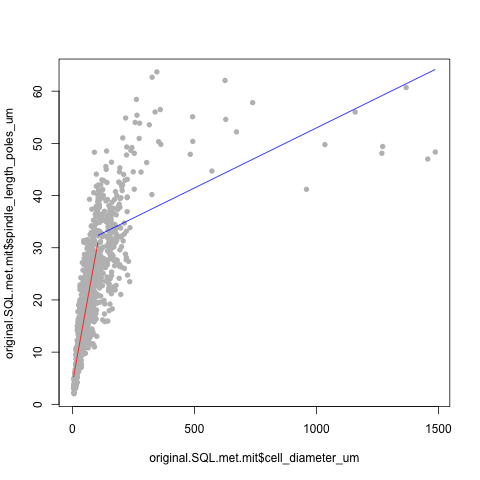

In [318]:
%%R
plot(original.SQL.met.mit$cell_diameter_um,original.SQL.met.mit$spindle_length_poles_um,pch=16,col='grey')
x0_1=min(original.SQL.met.mit$cell_diameter_um,na.rm=TRUE)
xFin_1=104
lines(c(x0_1,xFin_1),c(a1+b1*x0_1,a1+b1*xFin_1),col='red')

x0_2=104
xFin_2=max(original.SQL.met.mit$cell_diameter_um,na.rm=TRUE)
lines(c(x0_2,xFin_2),c(a2+b2*x0_2,a2+b2*xFin_2),col='blue')




In [336]:
%%R
#original.SQL.met.mit,'cell_diameter_um','spindle_length_poles_um'
model_1b=lm(data=original.SQL.met.mit,spindle_length_poles_um ~ cell_diameter_um*(cell_diameter_um<=110) + cell_diameter_um *(cell_diameter_um>110))
a1<-summary(model_1b)[[4]][[1]]+summary(model_1b)[[4]][[3]] #intercept 
a2<-summary(model_1b)[[4]][[1]] #intercept 
b1<-summary(model_1b)[[4]][[2]]+summary(model_1b)[[4]][[4]] #slope
b2<-summary(model_1b)[[4]][[2]] #slope


In [337]:
%%R
a1

[1] 3.900631


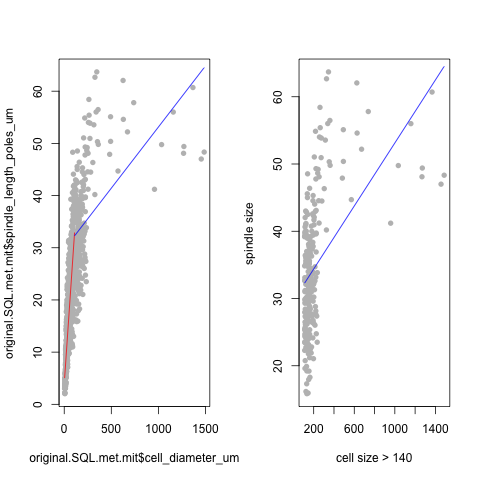

In [338]:
%%R
par(mfrow=c(1,2))
plot(original.SQL.met.mit$cell_diameter_um,original.SQL.met.mit$spindle_length_poles_um,pch=16,col='grey')
x0_1=min(original.SQL.met.mit$cell_diameter_um,na.rm=TRUE)
xFin_1=110
lines(c(x0_1,xFin_1),c(a1+b1*x0_1,a1+b1*xFin_1),col='red')

x0_2=110
xFin_2=max(original.SQL.met.mit$cell_diameter_um,na.rm=TRUE)
lines(c(x0_2,xFin_2),c(a2+b2*x0_2,a2+b2*xFin_2),col='blue')

plot(original.SQL.met.mit$cell_diameter_um[original.SQL.met.mit$cell_diameter_um>110],original.SQL.met.mit$spindle_length_poles_um[original.SQL.met.mit$cell_diameter_um>110],pch=16,col='grey',ylab='spindle size',xlab='cell size > 140')
lines(c(x0_2,xFin_2),c(a2+b2*x0_2,a2+b2*xFin_2),col='blue')



In [327]:
%%R
#original.SQL.met.mit,'cell_diameter_um','spindle_length_poles_um'
model_1c=lm(data=original.SQL.met.mit,spindle_length_poles_um ~ cell_diameter_um*(cell_diameter_um<=140) + cell_diameter_um *(cell_diameter_um>140))
a1<-summary(model_1c)[[4]][[1]]+summary(model_1c)[[4]][[3]] #intercept 
a2<-summary(model_1c)[[4]][[1]] #intercept 
b1<-summary(model_1c)[[4]][[2]]+summary(model_1c)[[4]][[4]] #slope
b2<-summary(model_1c)[[4]][[2]] #slope



In [328]:
%%R
a1

[1] 4.827086


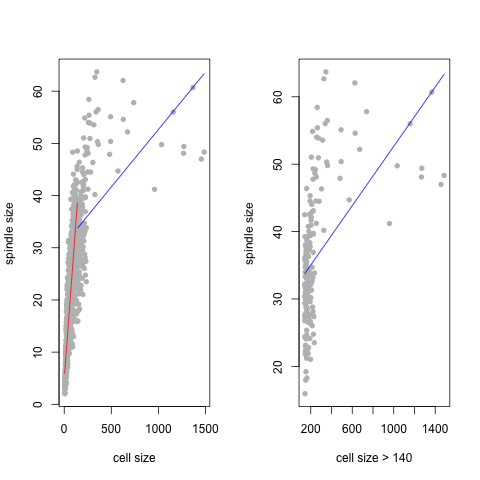

In [335]:
%%R
par(mfrow=c(1,2))
plot(original.SQL.met.mit$cell_diameter_um,original.SQL.met.mit$spindle_length_poles_um,pch=16,col='grey',ylab='spindle size',xlab='cell size')
x0_1=min(original.SQL.met.mit$cell_diameter_um,na.rm=TRUE)
xFin_1=140
lines(c(x0_1,xFin_1),c(a1+b1*x0_1,a1+b1*xFin_1),col='red')

x0_2=140
xFin_2=max(original.SQL.met.mit$cell_diameter_um,na.rm=TRUE)
lines(c(x0_2,xFin_2),c(a2+b2*x0_2,a2+b2*xFin_2),col='blue')

plot(original.SQL.met.mit$cell_diameter_um[original.SQL.met.mit$cell_diameter_um>140],original.SQL.met.mit$spindle_length_poles_um[original.SQL.met.mit$cell_diameter_um>140],pch=16,col='grey',ylab='spindle size',xlab='cell size > 140')
lines(c(x0_2,xFin_2),c(a2+b2*x0_2,a2+b2*xFin_2),col='blue')

###For individual organisms

One of the requirements we specified in function 'break_numbers' is that we need to have at least 3 points for each segments of the regression (i.e. we need at least 6 points total for the easiest case). If this is not the case, the function will break. Is this requirement fullfilled for all organisms in the data frame?

In other words, how many rows do we have per organism?  

In [96]:
%%R
#print(class(split(original.SQL.met.mit,original.SQL.met.mit$organism)))
#lapply(split(original.SQL.met.mit,original.SQL.met.mit$organism),dim)
lapply(split(original.SQL.met.mit,original.SQL.met.mit$organism),function(x) {dim(x)[1]} )

$asterina_miniata
[1] 158

$caenorhabditis_elegans
[1] 89

$cerebratulus_marginatus
[1] 33

$ciona_intestinalis
[1] 65

$danio_rerio
[1] 4

$drosophila_melanogaster
[1] 1

$helobdella_robusta
[1] 73

$Homo_sapiens
[1] 2

$mus_musculus
[1] 72

$Strongylocentrotus_purpuratus
[1] 265

$urechis_caupo
[1] 209

$xenopus_laevis
[1] 135



So there are a few organisms we need to get rid of. Let's create a filter.

In [97]:
%%R
dim(original.SQL.met.mit)

[1] 1106   40


In [98]:
%%R
#print(class(split(original.SQL.met.mit,original.SQL.met.mit$organism)))
#lapply(split(original.SQL.met.mit,original.SQL.met.mit$organism),dim)
#lapply(split(original.SQL.met.mit,original.SQL.met.mit$organism),function(x) {dim(x)[1]} )
rows_per_org<-by(original.SQL.met.mit, original.SQL.met.mit$organism, function(x){dim(x)}[1])
rows_per_org[rows_per_org>6]
row.names(cbind(rows_per_org[rows_per_org>6]))
row.names(cbind(rows_per_org[rows_per_org<6]))
row.names(cbind(rows_per_org[rows_per_org>6]))

[1] "asterina_miniata"              "caenorhabditis_elegans"       
[3] "cerebratulus_marginatus"       "ciona_intestinalis"           
[5] "helobdella_robusta"            "mus_musculus"                 
[7] "Strongylocentrotus_purpuratus" "urechis_caupo"                
[9] "xenopus_laevis"               


In [99]:
%%R
subset_doable=original.SQL.met.mit[original.SQL.met.mit$organism %in% row.names(cbind(rows_per_org[rows_per_org>6])),]
print(dim(subset_doable))
print(dim(original.SQL.met.mit[!original.SQL.met.mit$organism %in% row.names(cbind(rows_per_org[rows_per_org>6])),]))
#subset_doable

[1] 1099   40
[1]  7 40


In [251]:
%%R
print('ALL:')
print(unique(original.SQL.met.mit$organism))
print('DO-ABLE:')
print(unique(subset_doable$organism))
print('FINAL:')
print(names(rs))

[1] "ALL:"
 [1] "asterina_miniata"              "caenorhabditis_elegans"       
 [3] "cerebratulus_marginatus"       "ciona_intestinalis"           
 [5] "helobdella_robusta"            "Strongylocentrotus_purpuratus"
 [7] "urechis_caupo"                 "xenopus_laevis"               
 [9] "danio_rerio"                   "Homo_sapiens"                 
[11] "drosophila_melanogaster"       "mus_musculus"                 
[1] "DO-ABLE:"
[1] "asterina_miniata"              "caenorhabditis_elegans"       
[3] "cerebratulus_marginatus"       "ciona_intestinalis"           
[5] "helobdella_robusta"            "Strongylocentrotus_purpuratus"
[7] "urechis_caupo"                 "xenopus_laevis"               
[9] "mus_musculus"                 
[1] "FINAL:"
[1] "asterina_miniata"              "caenorhabditis_elegans"       
[3] "cerebratulus_marginatus"       "ciona_intestinalis"           
[5] "helobdella_robusta"            "mus_musculus"                 
[7] "Strongylocentrotus_purpuratus"

In [100]:
%%R
by(subset_doable, subset_doable$organism, function(x) break_number(x[,'cell_diameter_um']))

subset_doable$organism: asterina_miniata
 [1]  52  54  56  58  60  62  64  66  68  70  72  74  76  78  80  82  84  86  88
[20]  90  92  94  96  98 100 102 104 106 108 110 112 114 116 118 120 122 124 126
[39] 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158 160 162 164
[58] 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194 196 198 200 202
[77] 204 206 208 210 212 214 216 218 220
------------------------------------------------------------ 
subset_doable$organism: caenorhabditis_elegans
 [1]  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48 50
------------------------------------------------------------ 
subset_doable$organism: cerebratulus_marginatus
 [1] 28 30 32 34 36 38 40 42 44 46 48 50 52 54 56 58 60 62 64 66 68 70 72 74 76
[26] 78 80 82 84 86 88 90 92 94 96
------------------------------------------------------------ 
subset_doable$organism: ciona_intestinalis
 [1]  36  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70  72


In [101]:
%%R
rs<-by(subset_doable, subset_doable$organism, function(x) piecewise_reg(x,'cell_diameter_um','spindle_length_poles_um'))

#by(subset_doable, subset_doable$organism, function(x) break_number(x[,'cell_diameter_um']))
    
#piecewise_reg(subset_df,'cell_diameter_um','spindle_length_poles_um')

####Piecewise regression across all species::log-transformed

To get a general feel for what the result looks like at this stage, let's have a closer look at the reults from two organisms.

###Individual organisms: selected results

####Analysis: A. miniata

In [105]:
%%R
print(length(rs))
print(class(rs[[1]]))

[1] 9
[1] "list"


In [165]:
%%R
print(rs[[1]]$breaks[which(rs[[1]]$AIC==min(rs[[1]]$AIC))])
break_point=rs[[1]]$breaks[which(rs[[1]]$AIC==min(rs[[1]]$AIC))]
#print(sum(rs[[1]]$breaks<break_point))
#print(sum(rs[[1]]$breaks>break_point))


print(min(rs[[1]]$AIC))
print(max(rs[[1]]$AIC))

#test=rs[[1]]$AIC
#print(test)
#test2=rs[[1]]$sigma
#print(test2)
#print(ceiling(test))
#print(round(test))
#print(min(ceiling(test)))

print(rs[[1]]$breaks[which(ceiling(rs[[1]]$AIC)==min(ceiling(rs[[1]]$AIC)))])
print(rs[[1]]$breaks[which(round(rs[[1]]$AIC)==min(round(rs[[1]]$AIC)))])




[1] 84
[1] 951.0099
[1] 966.4813
 [1]  84  86  88  90  92  94  96  98 100 102
[1] 84 94


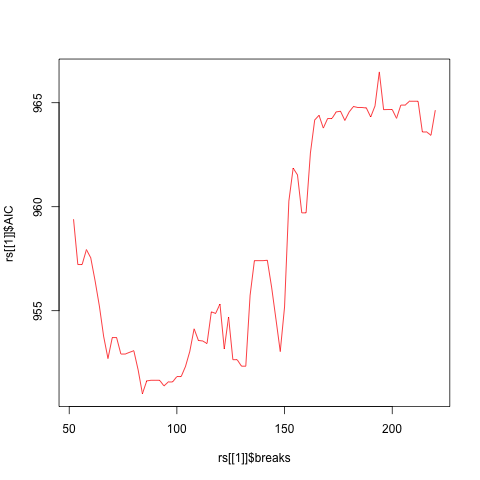

In [168]:
%%R
par(mfrow=c(1,1))
plot(rs[[1]]$breaks,rs[[1]]$AIC,type='l',col='red')

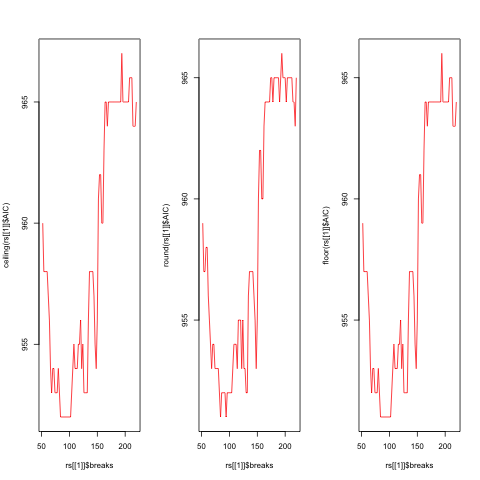

In [237]:
%%R
par(mfrow=c(1,3))
plot(rs[[1]]$breaks,ceiling(rs[[1]]$AIC),type='l',col='red')
plot(rs[[1]]$breaks,round(rs[[1]]$AIC),type='l',col='red')
plot(rs[[1]]$breaks,floor(rs[[1]]$AIC),type='l',col='red')


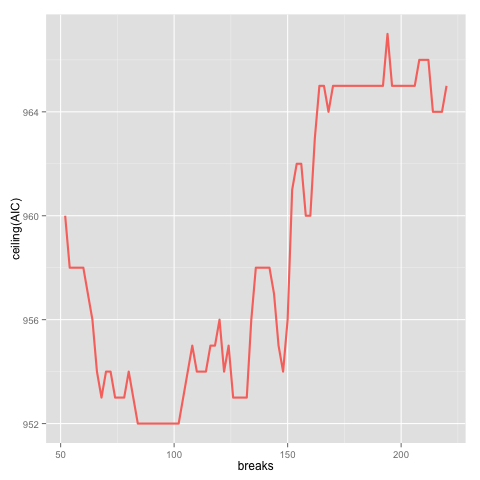

In [245]:
%%R
ggplot(data=as.data.frame(rs[[1]]))+geom_line(aes(x=breaks,y=ceiling(AIC)),size=1,col=mapping_vector2['asterina_miniata'])

####Analysis: X. laevis

In [224]:
%%R
subset_df=original.SQL.met.mit[original.SQL.met.mit$organism=="xenopus_laevis",]

In [225]:
%%R
break_number(subset_df['cell_diameter_um'])

  [1]   24   26   28   30   32   34   36   38   40   42   44   46   48   50   52
 [16]   54   56   58   60   62   64   66   68   70   72   74   76   78   80   82
 [31]   84   86   88   90   92   94   96   98  100  102  104  106  108  110  112
 [46]  114  116  118  120  122  124  126  128  130  132  134  136  138  140  142
 [61]  144  146  148  150  152  154  156  158  160  162  164  166  168  170  172
 [76]  174  176  178  180  182  184  186  188  190  192  194  196  198  200  202
 [91]  204  206  208  210  212  214  216  218  220  222  224  226  228  230  232
[106]  234  236  238  240  242  244  246  248  250  252  254  256  258  260  262
[121]  264  266  268  270  272  274  276  278  280  282  284  286  288  290  292
[136]  294  296  298  300  302  304  306  308  310  312  314  316  318  320  322
[151]  324  326  328  330  332  334  336  338  340  342  344  346  348  350  352
[166]  354  356  358  360  362  364  366  368  370  372  374  376  378  380  382
[181]  384  386  388  390  3

In [226]:
%%R
xl=piecewise_reg(subset_df,'cell_diameter_um','spindle_length_poles_um')

In [230]:
%%R
#print(which(ceiling(xl$AIC)==min(ceiling(xl$AIC))))
print(xl$breaks[which(ceiling(xl$AIC)==min(ceiling(xl$AIC)))])

#print(which(floor(xl$AIC)==min(floor(xl$AIC))))
print(xl$breaks[which(floor(xl$AIC)==min(floor(xl$AIC)))])

 [1] 254 256 258 260 262 264 266 268 270 272
 [1] 254 256 258 260 262 264 266 268 270 272


In [236]:
%%R
print(min(xl$AIC))
print(min(floor(xl$AIC)))

print(xl$breaks[which(floor(xl$AIC)==min(floor(xl$AIC)))])



print(min(xl$AIC*10))
print(min(ceiling(xl$AIC/10)))

print(xl$breaks[which(ceiling(xl$AIC/10)==min(ceiling(xl$AIC/10)))])

[1] 863.7204
[1] 863
 [1] 254 256 258 260 262 264 266 268 270 272
[1] 8637.204
[1] 87
  [1] 122 124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156
 [19] 158 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192
 [37] 194 196 198 200 202 204 206 208 210 212 214 216 218 220 222 224 226 228
 [55] 230 232 234 236 238 240 242 244 246 248 250 252 254 256 258 260 262 264
 [73] 266 268 270 272 274 276 278 280 282 284 286 288 290 292 294 296 298 300
 [91] 302 304 306 308 310 312 314 316 318 320 322 324


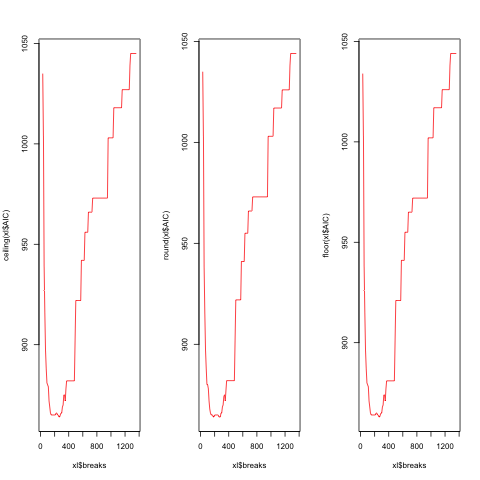

In [200]:
%%R
par(mfrow=c(1,3))
plot(xl$breaks,ceiling(xl$AIC),type='l',col='red')
plot(xl$breaks,round(xl$AIC),type='l',col='red')
plot(xl$breaks,floor(xl$AIC),type='l',col='red')


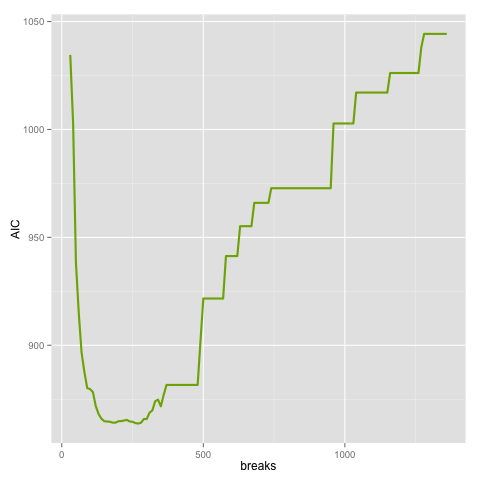

In [201]:
%%R 
ggplot(data=as.data.frame(piecewise_reg(subset_df,'cell_diameter_um','spindle_length_poles_um')))+geom_line(aes(x=breaks,y=AIC),size=1,col=mapping_vector2['xenopus_laevis'])

###Saving optimization plots

In [255]:
%%R
plotter<-function(list_of_models){
    #Saves batch generated plots as PNG files. It is currently not possible to save vector graphics from Jupyter
    #(not sure where the bug is coming from)
    
    for (i in 1:length(list_of_models)){
        plot<-ggplot(data=as.data.frame(rs[[i]]))+geom_line(aes(x=breaks,y=ceiling(AIC)),size=1,col=mapping_vector2[names(rs)[[i]]])
        ggsave(filename=paste(i,'_PR_AIC_',names(rs)[[i]],'.png',sep=''),plot=plot)
    }
}

In [491]:
%%R
plotter(rs)

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


###Getting break points size

In [ ]:
%%R
print(which(pr.cell_diam.sp_len.p2p$AIC==min(pr.cell_diam.sp_len.p2p$AIC)))

print(pr.cell_diam.sp_len.p2p$breaks[which(pr.cell_diam.sp_len.p2p$AIC==min(pr.cell_diam.sp_len.p2p$AIC))])
print(pr.cell_diam.sp_len.p2p$breaks[which(ceiling(pr.cell_diam.sp_len.p2p$AIC)==min(ceiling(pr.cell_diam.sp_len.p2p$AIC)))])

We are interested in the exact value and in potential ranges.

In [279]:
%%R 
names(rs)

[1] "asterina_miniata"              "caenorhabditis_elegans"       
[3] "cerebratulus_marginatus"       "ciona_intestinalis"           
[5] "helobdella_robusta"            "mus_musculus"                 
[7] "Strongylocentrotus_purpuratus" "urechis_caupo"                
[9] "xenopus_laevis"               


In [276]:
%%R 
return_PR_breaks<-function(output_list_PR_entry){
    
    #Arg: individual entry from a list (a returned by piecewise_reg())
    #Returns a list, where the first entry is the cell size corresponding to the minimum of AIC (strict output)
    #and the second is a range of cell sizes for the range of optimal AIC (relaxed output)
    
    
    min_AIC=output_list_PR_entry$breaks[which(output_list_PR_entry$AIC==min(output_list_PR_entry$AIC))]
    range_AIC=output_list_PR_entry$breaks[which(ceiling(output_list_PR_entry$AIC)==min(ceiling(output_list_PR_entry$AIC)))]
    
    final_breaks=list(min_AIC=min_AIC, range_AIC=range_AIC)
    return(final_breaks)
}
#rs



In [288]:
%%R
final_break_points=lapply(rs,return_PR_breaks)